<a href="https://colab.research.google.com/github/mwarnsle1/Cap1-fem/blob/main/(Phase_2)Module_6_Capstone_1_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


cancer_ALL= pd.read_csv('https://raw.githubusercontent.com/mwarnsle1/Cap1-fem/main/DeathTrend-new.xlsx%20-%20All%20US.csv', skiprows=6)
cancer_ALL.head()
cancer_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          89 non-null     int64  
 1   All cancer types combined / Female            89 non-null     float64
 2   All cancer types combined / Male              89 non-null     float64
 3   Breast / Female                               89 non-null     float64
 4   Breast / Male                                 0 non-null      float64
 5   Colorectum / Female                           89 non-null     object 
 6   Colorectum / Male                             89 non-null     object 
 7   Leukemia / Female                             89 non-null     float64
 8   Leukemia / Male                               89 non-null     float64
 9   Liver and intrahepatic bile duct / Female     89 non-null     objec

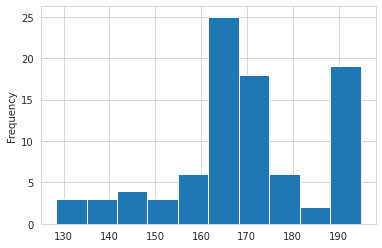

In [ ]:
sns.set_style('whitegrid')

cancer_ALL = pd.read_csv('https://raw.githubusercontent.com/mwarnsle1/Cap1-fem/main/DeathTrend-new.xlsx%20-%20All%20US.csv', skiprows=6)
cancerALLgrpA = cancer_ALL.groupby(['Year'])['All cancer types combined / Female'].sum().reset_index()

cancerALLgrpA['All cancer types combined / Female'].plot(kind='hist')

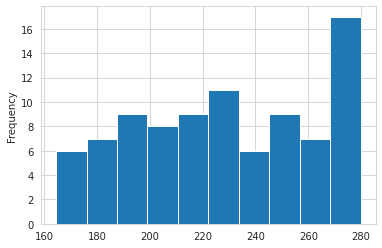

In [ ]:
sns.set_style('whitegrid')

cancer_ALL = pd.read_csv('https://raw.githubusercontent.com/mwarnsle1/Cap1-fem/main/DeathTrend-new.xlsx%20-%20All%20US.csv', skiprows=6)
cancerALLgrpB = cancer_ALL.groupby(['Year'])['All cancer types combined / Male'].sum().reset_index()

cancerALLgrpB['All cancer types combined / Male'].plot(kind='hist')

In [ ]:
#finding the descriptive stats for both hypotheses(and seeing if skewness & kurtosis are between 3 and -3):
from scipy import stats

print(stats.describe(cancerALLgrpA['All cancer types combined / Female']))
print(stats.describe(cancerALLgrpB['All cancer types combined / Male']))

DescribeResult(nobs=89, minmax=(128.4, 194.8), mean=169.42022471910113, variance=248.1341317671093, skewness=-0.4468773335474933, kurtosis=-0.052797361479377525)
DescribeResult(nobs=89, minmax=(164.5, 279.8), mean=228.4955056179775, variance=1161.2136159346273, skewness=-0.10293982076403167, kurtosis=-1.1886328822352543)


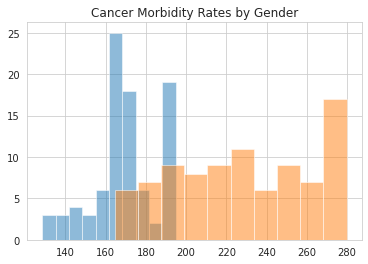

DescribeResult(nobs=89, minmax=(128.4, 194.8), mean=169.42022471910113, variance=248.1341317671093, skewness=-0.4468773335474933, kurtosis=-0.052797361479377525)
DescribeResult(nobs=89, minmax=(164.5, 279.8), mean=228.4955056179775, variance=1161.2136159346273, skewness=-0.10293982076403167, kurtosis=-1.1886328822352543)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#test the distribution's normality w/ descriptive stats(skewness/kurtosis):

cancerALLgrpA1 = cancerALLgrpA.loc[(cancerALLgrpA['Year']>=1980) & (cancerALLgrpA['Year']< 2018)]
cancerALLgrpB2 = cancerALLgrpB.loc[(cancerALLgrpB['Year']>=1980) & (cancerALLgrpB['Year']< 2018)]


plt.hist(cancerALLgrpA['All cancer types combined / Female'], alpha = .5)
plt.hist(cancerALLgrpB['All cancer types combined / Male'], alpha = .5)
plt.title("Cancer Morbidity Rates by Gender")
plt.show()

print(stats.describe(cancerALLgrpA['All cancer types combined / Female']))
print(stats.describe(cancerALLgrpB['All cancer types combined / Male']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


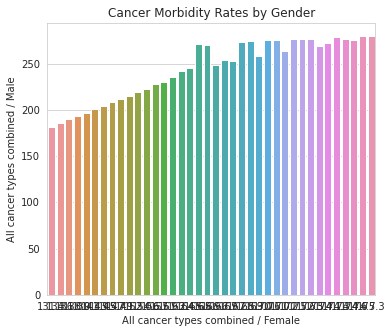

In [ ]:
import seaborn as sns

cancerALLgrpA1 = cancerALLgrpA.loc[(cancerALLgrpA['Year']>=1980) & (cancerALLgrpA['Year']< 2018)]
cancerALLgrpB2 = cancerALLgrpB.loc[(cancerALLgrpB['Year']>=1980) & (cancerALLgrpB['Year']< 2018)]

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(cancerALLgrpA1['All cancer types combined / Female'], cancerALLgrpB2['All cancer types combined / Male'])
plt.title("Cancer Morbidity Rates by Gender")

#plt.hist(cancerALLgrpA['All cancer types combined / Female'], alpha = .5)
#plt.hist(cancerALLgrpB['All cancer types combined / Male'], alpha = .5)
#plt.title("Cancer Morbidity Rates by Gender")
#plt.show()


#plt.hist(cancerALLgrpA1['All cancer types combined / Female'], cancerALLgrpB2['All cancer types combined / Male'])
#plt.title("Cancer Morbidity Rates by Gender")
#plt.show()

#print(stats.describe(cancerALLgrpA['All cancer types combined / Female']))
#print(stats.describe(cancerALLgrpB['All cancer types combined / Male']))

plt.show()

In [ ]:
#the descriptive stats appeared to indicate a distribution within the normal range enough to procede with an independent samples t-test(w/o the years added):

stats.ttest_ind(cancerALLgrpA['All cancer types combined / Female'], cancerALLgrpB['All cancer types combined / Male'])

Ttest_indResult(statistic=-14.84539357043202, pvalue=7.496152738060725e-33)

In [ ]:
#with the range of years added:

stats.ttest_ind(cancerALLgrpA1['All cancer types combined / Female'], cancerALLgrpB2['All cancer types combined / Male'])

Ttest_indResult(statistic=-14.624044068916177, pvalue=1.5854125651841823e-23)

In [ ]:
#further analysis done with a two-proportion z-test can differentiate the samples:

from statsmodels.stats.weightstats import ztest

ztest(cancerALLgrpA1['All cancer types combined / Female'], cancerALLgrpB2['All cancer types combined / Male'])

(-14.624044068916177, 1.9732287484984464e-48)